In [600]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import linear_model as lm
from sklearn.preprocessing import PolynomialFeatures as pf
import matplotlib.pyplot as plt
import pickle
import random
from functools import partial

## Task 1
---
### Task 1(a)

From multivariable calculus, we know that the gradient of a multivariable function represents the direction of steepest ascent. Hence, the negative of the gradient represents the direction of steepest descent.

Mathematically it is represented as a matrix of the partial derivatives of the function:
$$\nabla f = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}$$

We use this property for the optimization algorithm known as gradient descent. Here the objective is to minimize a cost function that may change depending on the context. The cost function is chosen such that minimizing it brings us the closest to the objective value.

For example, for Linear regression the cost function may be the MSE (Mean Squared Error). By minimizing the MSE, we are in a sense obtaining the line that best fits the dataset. The MSE is a function of the parameters of the linear model, \(m\) and \(b\), and can be represented as:

$$
MSE(m, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (mx_i + b))^2
$$

where $y_i$ is the actual target value, $(x_i)$ is the corresponding feature value, and $(n)$ is the number of data points.

To minimize this cost function, we ue gradient descent. Using the property described earlier, we move in the opposite direction of the gradient to descend towards the minimum of the function.

The gradient of the MSE with respect to the parameters $m$ and $b$ can be calculated as follows:

$$
\nabla MSE(m, b) = \begin{bmatrix}
\frac{\partial MSE}{\partial m} \\
\frac{\partial MSE}{\partial b}
\end{bmatrix}
$$

Where

$$
\frac{\partial MSE}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} x_i(y_i - (mx_i + b))
$$

and

$$
\frac{\partial MSE}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (mx_i + b))
$$

Once we have the gradient, we update the parameters \(m\) and \(b\) iteratively using the following update rule:

$$
m := m - \alpha \frac{\partial (MSE)}{\partial m}
$$

$$
b := b - \alpha \frac{\partial (MSE)}{\partial b}
$$

Here, $\alpha$ is the learning rate, which determines the size of the steps we take in the direction of the negative gradient. By repeating this process iteratively, we gradually approach the values of \(m\) and \(b\) that minimize the MSE, thereby obtaining the best-fitting line for the given dataset. We know this minima is reached if further iterations do not reduce the value of our cost function.



### Task 1(b)


In the case of multiple linear regression, we have $m$ independent variables $(x_1, x_2, \ldots, x_m)$, and the linear model can be represented as:

$$
y = b + m_1x_1 + m_2x_2 + \ldots + m_mx_m
$$

where \(y\) is the dependent variable (the target we want to predict), \(m_i\) is the coefficient for the \(i\)-th independent variable \(x_i\), and \(b\) is the y-intercept.

The MSE for multiple linear regression can be expressed as:

$$
MSE(m_1, m_2, \ldots, m_m, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (m_1x_{i1} + m_2x_{i2} + \ldots + m_mx_{im} + b))^2
$$

where \(x_{i1}, x_{i2}, \ldots, x_{im}\) are the feature values of the \(i\)-th data point.

To minimize this cost function using gradient descent, the process reamains exactly the same. We need to compute the gradient of the MSE with respect to each parameter \(m_i\) and \(b\) which can be expressed as:

$$
\nabla MSE(m_1, m_2, \ldots, m_m, b) = \begin{bmatrix}
\frac{\partial MSE}{\partial m_1} \\
\frac{\partial MSE}{\partial m_2} \\
\vdots \\
\frac{\partial MSE}{\partial m_m} \\
\frac{\partial MSE}{\partial b}
\end{bmatrix}
$$

The partial derivatives of the MSE with respect to each parameter can be calculated as follows:

$$
\frac{\partial MSE}{\partial m_i} = -\frac{2}{n} \sum_{i=1}^{n} x_{ij}(y_i - (m_1x_{i1} + m_2x_{i2} + \ldots + m_mx_{im} + b))
$$

$$
\frac{\partial MSE}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (m_1x_{i1} + m_2x_{i2} + \ldots + m_mx_{im} + b))
$$

Once we have the gradient, we update each parameter $m_i$ and $b$ iteratively using the following update rules:

$$
m_i := m_i - \alpha \frac{\partial (MSE)}{\partial m_i}
$$

$$
b := b - \alpha \frac{\partial (MSE)}{\partial b}
$$

Here, $\alpha$ is the learning rate, which determines the size of the steps we take in the direction of the negative gradient. By repeating this process iteratively, we gradually approach the values of $m_i$ and $b$ that minimize the MSE, thereby obtaining the best-fitting line for the given dataset with multiple independent variables.

## Task 2
---

In [601]:
x = [-2, -1, 0, 1, 2, 3]
y = [5, 0, 1, 4, 11, 22]

def func1(x):
    return 2*x**2+3*x+1

def func2(x):
    return x**2+3*x

def func3(x):
    return 2*x**2+2*x+1

def trueVal(x_vals, y_vals, x):
    lst_zip=list(zip(x_vals, y_vals))
    for zip_tuple in lst_zip:
        try:
            if zip_tuple[0] == x:
                return zip_tuple[1]
        except:
            print(f"shaope {np.shape(zip_tuple[0])}")

models = [func1, func2, func3]
print(trueVal(x, y, 3))
print(y)
# print(list(map(func, x)))

22
[5, 0, 1, 4, 11, 22]


In [602]:
def expecOverVals(func, x_vals):
    E_x=np.mean(np.array(list(map(func, x_vals))))
    return E_x

def expecOverModels(models, x):
    sum = 0
    for func in models:
        # print(func(x))
        sum+=func(x)
    return sum / len(models)

def bias(models, trueVal, x_vals, y_vals, x):    
    return expecOverModels(models, x) - trueVal(x_vals, y_vals ,x)

def variance(models, x):
    E_x = expecOverModels(models, x)
    var = 0
    for func in models:
        var += (func(x) - E_x)**2
    return var / len(models)

def mse(models, x_vals, y_vals, trueVal, x):
    y = trueVal(x_vals, y_vals, x)
    var = 0
    for func in models: 
        var += (y - func(x))**2    
    return var / len(models)

tot_bias = 0
tot_var = 0
tot_mse = 0
print(x)
for t in x:
    tot_bias +=(bias(models, trueVal, x, y, t))**2
    tot_var += variance(models, t)
    tot_mse += mse(models, x, y, trueVal, t)

bias_sq_final = tot_bias / len(x)
var_final = tot_var / len(x)
mse_final = tot_mse/len(x)

print(mse_final)
print(var_final)
print(bias_sq_final)

[-2, -1, 0, 1, 2, 3]
8.111111111111112
5.481481481481481
2.6296296296296298


In [603]:
mse_final - var_final - bias_sq_final

## This is approximately zero, accounting for rounding error and floating point accuracy.

1.7763568394002505e-15

## Task 3
---

### Task 3.1

In [604]:
file_path='data.pickle'

with open(file_path, 'rb') as f:
    data = pickle.load(f)



In [605]:
train_data=data['train']
test_data=data['test']
print(test_data)

class_size = len(train_data) // 15
random.shuffle(train_data)
train_classes = []

for i in range(15):
    class_data = train_data[i * class_size: (i + 1) * class_size]
    train_classes.append(class_data)


[[28.53       20.50284604]
 [12.89       22.58147766]
 [43.6        20.0128624 ]
 [53.61       19.99694445]
 [75.77       19.15685586]
 [13.15       22.52776216]
 [95.42       15.35569432]
 [59.72       19.95507027]
 [62.16       19.91217663]
 [82.15       18.35844578]
 [87.37       17.41791221]
 [83.02       18.22101763]
 [56.13       19.98829552]
 [41.88       20.02700685]
 [ 3.7        25.00405315]
 [53.81       19.9965631 ]
 [47.61       19.99977294]
 [44.99       20.00573948]
 [ 0.19       26.22714303]
 [48.56       19.99917637]
 [51.71       19.99882557]
 [17.31       21.76673153]
 [88.76       17.11790408]
 [43.49       20.01357722]
 [54.24       19.9955907 ]
 [11.79       22.81715582]
 [60.58       19.94213017]
 [20.18       21.34233196]
 [ 1.18       25.8640405 ]
 [17.16       21.79108143]
 [99.1        14.12916865]
 [26.28       20.67730471]
 [89.31       16.99305845]
 [33.83       20.21546528]
 [64.29       19.85732315]
 [ 3.81       24.96856385]
 [92.02       16.32503929]
 

### Task 3.2

In [606]:
def predictFromModel(model, x):
    x = np.array(x)
    if np.shape(x) == ():
        x = x.reshape(1,-1)
    else:
        x=x.reshape(1,-1)
    # print(np.shape(x))
    
    return model.predict(x)

def partialPredict(model):
    return partial(predictFromModel, model)



In [607]:

model_biases_linear = []
model_variances_linear = []
model_list_linear=[]

test_inp, test_out = [val_tups[0] for val_tups in test_data], [val_tups[1] for val_tups in test_data]

def train_linear_models(train_classes) :
    models_linear = []
    for eq_class in train_classes:
        x_vals=[]
        y_vals=[]
        for val_tups in eq_class:
            x_vals.append(val_tups[0])
            y_vals.append(val_tups[1])

        x_val_arr = np.array(x_vals)
        x_val_arr = x_val_arr.reshape(-1, 1)
        y_val_arr = np.array(y_vals)
        y_val_arr = y_val_arr.reshape(-1, 1)

        # print(np.shape(x_val_arr))
        model = lm.LinearRegression().fit(x_val_arr, y_val_arr)
        models_linear.append(model)
        
    return models_linear

predictors_linear = train_linear_models(train_classes)



In [608]:
def create_model_list(predictor_list):
    model_list = []
    for model in predictor_list:
        model_list.append(partialPredict(model))
    return model_list

model_list_linear = create_model_list(predictors_linear)
bias_total = 0

for tc in test_inp:
    bias_total += (bias(model_list_linear, trueVal, test_inp, test_out, tc))**2

print(bias_total / len(test_inp))


[[0.98154919]]


In [609]:
def train_models(train_classes, degree) :
    poly_models = []
    for eq_class in train_classes:
        x_vals=[]
        y_vals=[]
        for val_tups in eq_class:
            x_vals.append(val_tups[0])
            y_vals.append(val_tups[1])

        x_val_arr = np.array(x_vals)
        x_val_arr = x_val_arr.reshape(-1, 1)
        y_val_arr = np.array(y_vals)
        y_val_arr = y_val_arr.reshape(-1, 1)

        poly = pf(degree)
        x_pol_arr = poly.fit_transform(x_val_arr)
        model = lm.LinearRegression().fit(x_pol_arr, y_val_arr)
        poly_models.append(model)
        
    return poly_models

degree = 3
predictors = train_models(train_classes, degree)
x = np.array([1, 2, 4, 8])
x = x.reshape(1, -1)
print(predictors[1].predict(x))



[[25.53023236]]


In [617]:
bias_final_lst = []
bias_sqr_final_lst = []

for degree in range(1, 11):
    predictors = train_models(train_classes, degree)
    bias = 0
    bias_sqr = 0

    for val_tups in test_data:
        t = val_tups[0]
        test_out = val_tups[1]
        tc = []
        for d in range(degree+1):
            tc.append(t ** d)
        # print(tc)
        tc = np.array(tc)
        tc = tc.reshape(1, -1)

        ## Expectation over all models for a given test case
        expec = 0
        for model_final in predictors: 
            expec += model_final.predict(tc)  
        
        expec = expec / len(predictors) 
        bias += (expec - test_out)
        bias_sqr += (expec - test_out)**2

    bias = bias / len(test_data)
    bias_sqr = bias_sqr / len(test_data)
    bias_final_lst.append(bias)
    bias_sqr_final_lst.append(bias_sqr)

print(bias_final_lst)
print(bias_sqr_final_lst)
scalar_list_bias_sqr = np.array(bias_sqr_final_lst).ravel().tolist()
scalar_list_bias = np.array(bias_final_lst).ravel().tolist()
print(scalar_list_bias_sqr)


[array([[-0.21732065]]), array([[-0.20182878]]), array([[0.04720676]]), array([[0.05807264]]), array([[0.04117332]]), array([[0.04050951]]), array([[0.03935146]]), array([[0.0191335]]), array([[-0.01071052]]), array([[-0.0349803]])]
[array([[0.98154919]]), array([[0.91164796]]), array([[0.03104775]]), array([[0.04047747]]), array([[0.03708453]]), array([[0.03576668]]), array([[0.03413331]]), array([[0.04373725]]), array([[0.10811752]]), array([[0.26030045]])]
[0.9815491889914443, 0.9116479643482144, 0.031047753888678004, 0.040477469480774644, 0.037084531475753295, 0.03576667791648854, 0.03413331097843926, 0.04373724738105357, 0.10811751878726343, 0.26030044695887267]


In [611]:
var_final_lst = []

model_expecs = []
for model_final in predictors:
    expec = 0
    for val_tups in test_data:
        t = val_tups[0]
        tc = []
        for d in range(degree+1):
            tc.append(t ** d)
        tc = np.array(tc)
        tc = tc.reshape(1, -1)

        expec += model_final.predict(tc)

    model_expecs.append(expec / len(test_data))


for degree in range(1, 11):
    predictors = train_models(train_classes, degree)
    var = 0

    for val_tups in test_data:
        t = val_tups[0]
        test_out = val_tups[1]
        tc = []

        for d in range(degree+1):
            tc.append(t ** d)
        tc = np.array(tc)
        tc = tc.reshape(1, -1)

        ## Expectation over all models for a given test case
        var = 0
        for idx in range(len(predictors)): 
            var += (predictors[idx].predict(tc) - model_expecs[idx])**2 
        
        var = var / len(predictors) 

    var_final_lst.append(var)

print(var_final_lst)
scalar_list_var = np.array(var_final_lst).ravel().tolist()
print(scalar_list_var)


[array([[0.14811159]]), array([[0.33563061]]), array([[0.23639829]]), array([[0.29950192]]), array([[0.29597578]]), array([[0.22169102]]), array([[0.21582707]]), array([[0.26505139]]), array([[0.21141368]]), array([[0.11995415]])]
[0.1481115919319427, 0.33563061078557044, 0.23639829165904377, 0.29950192381702795, 0.29597578224744747, 0.22169102490182832, 0.21582707233632445, 0.2650513915278599, 0.21141368015790535, 0.11995414522238021]


In [612]:
mse_final_lst = []

for degree in range(1, 11):
    predictors = train_models(train_classes, degree)
    mse_tot = 0
    for val_tups in test_data:
        t = val_tups[0]
        test_out = val_tups[1]
        tc = []

        for d in range(degree+1):
            tc.append(t ** d)
        tc = np.array(tc)
        tc = tc.reshape(1, -1)

        ## Expectation over all models for a given test case
        mse = 0
        for idx in range(len(predictors)): 
            mse += (predictors[idx].predict(tc) - test_out)**2 
        
        mse = mse / len(predictors) 
        mse_tot += mse
    
    mse_tot=mse_tot/len(test_data)
    mse_final_lst.append(mse_tot)

print(mse_final_lst)
scalar_list_mse= np.array(mse_final_lst).ravel().tolist()
print(scalar_list_mse)

[array([[1.03103856]]), array([[1.00606044]]), array([[0.17120386]]), array([[0.23295884]]), array([[0.27259421]]), array([[0.27907159]]), array([[0.32479675]]), array([[0.31746318]]), array([[0.36123613]]), array([[0.51921623]])]
[1.031038558812385, 1.0060604415507972, 0.17120386167216875, 0.23295883823840208, 0.27259421385029126, 0.2790715902910634, 0.32479674531433883, 0.3174631807538569, 0.3612361258273535, 0.5192162273935649]


In [619]:
df = pd.DataFrame({'Polynomial Degree': x_axis_degrees,
                   'Bias^2': scalar_list_bias_sqr,
                   'Bias' : scalar_list_bias,
                   'Variance': scalar_list_var})

print(df.to_markdown(index= False))

|   Polynomial Degree |    Bias^2 |       Bias |   Variance |
|--------------------:|----------:|-----------:|-----------:|
|                   1 | 0.981549  | -0.217321  |   0.148112 |
|                   2 | 0.911648  | -0.201829  |   0.335631 |
|                   3 | 0.0310478 |  0.0472068 |   0.236398 |
|                   4 | 0.0404775 |  0.0580726 |   0.299502 |
|                   5 | 0.0370845 |  0.0411733 |   0.295976 |
|                   6 | 0.0357667 |  0.0405095 |   0.221691 |
|                   7 | 0.0341333 |  0.0393515 |   0.215827 |
|                   8 | 0.0437372 |  0.0191335 |   0.265051 |
|                   9 | 0.108118  | -0.0107105 |   0.211414 |
|                  10 | 0.2603    | -0.0349803 |   0.119954 |


## Task 4
---

In [614]:
irreduc_err_lst = []
for i in range(len(scalar_list_mse)):
    irreduc_err = scalar_list_mse[i] - (scalar_list_bias_sqr[i]) - (scalar_list_var[i])
    irreduc_err_lst.append(irreduc_err)

print(irreduc_err_lst)

[-0.09862222211100205, -0.2412181335829876, -0.09624218387555303, -0.1070205550594005, -0.06046609987290952, 0.021613887472746507, 0.07483636199957514, 0.008674541844943429, 0.04170492688218469, 0.138961635212312]


In [615]:
df_err = pd.DataFrame({'Polynomial Degree': x_axis_degrees,
                   'Irreducible error': irreduc_err_lst})

print(df_err.to_markdown(index= False))

|   Polynomial Degree |   Irreducible error |
|--------------------:|--------------------:|
|                   1 |         -0.0986222  |
|                   2 |         -0.241218   |
|                   3 |         -0.0962422  |
|                   4 |         -0.107021   |
|                   5 |         -0.0604661  |
|                   6 |          0.0216139  |
|                   7 |          0.0748364  |
|                   8 |          0.00867454 |
|                   9 |          0.0417049  |
|                  10 |          0.138962   |


## Task 5
---

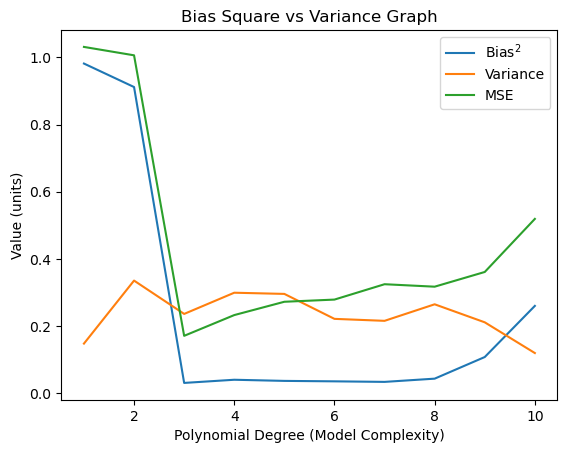

In [616]:

x_axis_degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

plt.plot(x_axis_degrees, scalar_list_bias_sqr, label='Bias$^{2}$')
plt.plot(x_axis_degrees, scalar_list_var, label='Variance')
plt.plot(x_axis_degrees, scalar_list_mse, label='MSE')

plt.xlabel('Polynomial Degree (Model Complexity)')
plt.ylabel('Value (units)')
plt.title('Bias Square vs Variance Graph')

plt.legend()
plt.show()


We have high bias and low variance initially, but as model complexity keeps increasing, the bias decreases whereas the variance is seen to increase.

We go from a \textbf{simple, high bias, low variance} model, that is an \textbf{underfit} model to a \textbf{complex, low bias, high variance} model which is an {overfit} model. 



We observe that the minima for the MSE occurs at polynomial Degree = 3.

Therefore the data complexity is best approximated by a univariate polynomial of degree 3. 
i.e a polynomial of the form: 
$ax^{3} + b x ^{2} + c x + d$